# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fathir Ikhsan
- **Email:** fatir12iksan@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Apa saja faktor utama yang mempengaruhi permintaan penyewaan sepeda?
- Bagaimana fluktuasi penyewaan sepeda antara pengguna biasa dan pengguna terdaftar di sepanjang musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Scoring Table `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Scoring Table `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Memperbaiki Tipe Data

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [15]:
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Duplicate data

In [16]:
day_df.duplicated().sum()

0

In [17]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [18]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Membersihkan tabel `hour_df`

In [19]:
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Memperbaiki Tipe Data

In [20]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [21]:
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Duplicate data

In [22]:
hour_df.duplicated().sum()

0

In [23]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [24]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [25]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
628,629,2012-09-20,3,1,9,0,4,1,1,0.546667,0.532192,0.618333,0.118167,939,6781,7720
156,157,2011-06-06,2,0,6,0,1,1,1,0.678333,0.621858,0.600000,0.121896,673,3875,4548
285,286,2011-10-13,4,0,10,0,4,1,2,0.589167,0.551804,0.896667,0.141787,290,2623,2913
63,64,2011-03-05,1,0,3,0,6,0,2,0.384167,0.378779,0.789167,0.251871,640,1437,2077
278,279,2011-10-06,4,0,10,0,4,1,1,0.494167,0.480425,0.620833,0.134954,639,4126,4765


In [26]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [28]:
day_df.instant.is_unique

True

In [29]:
day_df.season.is_unique

False

In [30]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [31]:
day_df.season.duplicated

<bound method Series.duplicated of 0      1
1      1
2      1
3      1
4      1
      ..
726    1
727    1
728    1
729    1
730    1
Name: season, Length: 731, dtype: int64>

In [32]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "weekday": "mean",
    "workingday": "mean"
})

,instant,weekday,workingday
season,,,
1,181,3.000000,0.662983
2,184,2.989130,0.695652
3,188,3.031915,0.696809
4,178,2.966292,0.679775


In [33]:
day_df.groupby(by="season").temp.sum()

season
1     53.892306
2    100.170549
3    132.786150
4     75.277275
Name: temp, dtype: float64

In [34]:
day_df.groupby(by="season").atemp.sum()

season
1     53.741424
2     95.736548
3    123.308898
4     73.965896
Name: atemp, dtype: float64

### Explore `hour_df`

In [35]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8643,8644,2011-12-31,1,0,12,22,0,6,0,1,0.38,0.3939,0.62,0.1343,2,36,38
2488,2489,2011-04-18,2,0,4,14,0,1,1,2,0.58,0.5455,0.49,0.1940,49,95,144
1119,1120,2011-02-19,1,0,2,9,0,6,0,1,0.40,0.4091,0.16,0.6567,18,37,55
13043,13044,2012-07-02,3,1,7,16,0,1,1,1,0.84,0.7424,0.36,0.2836,61,304,365
9366,9367,2012-01-31,1,1,1,4,0,2,1,1,0.30,0.2879,0.49,0.1940,0,1,1


In [36]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [37]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "weekday": "mean",
    "workingday": "mean"
})

,instant,weekday,workingday
season,,,
1,4242,3.008722,0.658652
2,4409,2.991608,0.695396
3,4496,3.033141,0.698621
4,4232,2.979915,0.676749


In [38]:
day_df.groupby(by="season").temp.sum()

season
1     53.892306
2    100.170549
3    132.786150
4     75.277275
Name: temp, dtype: float64

In [39]:
day_df.groupby(by="season").atemp.sum()

season
1     53.741424
2     95.736548
3    123.308898
4     73.965896
Name: atemp, dtype: float64

### Explore `day_df` & `hour_df`

In [40]:
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="right",
    left_on="instant",
    right_on="instant"
)
hour_day_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
hour_day_df.groupby(by="season_x").agg({
    "instant": "nunique",
    "weekday_x": "mean",
    "workingday_x": "mean",
    "cnt_y":"sum"
})

,instant,weekday_x,workingday_x,cnt_y
season_x,,,,
1,731,2.905609,0.645691,3292679


In [42]:
hour_day_df.groupby(by="season_x").agg({
    "instant": "nunique",
    "weekday_x": "sum",
    "workingday_x": "sum",
    "cnt_y":"sum"
}).sort_values(by="cnt_y", ascending=False)

,instant,weekday_x,workingday_x,cnt_y
season_x,,,,
1,731,2124,472,3292679


### Explore all data

In [43]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="right",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
all_df.groupby(by=["weekday_x", "workingday_x"]).agg({
    "registered_y": "sum",
    "cnt_y": "sum"
})

registered_y   cnt_y
weekday_x workingday_x                      
0         0                   421249  519780
1         0                    69666   76004
          1                   338917  422886
2         1                   366354  443863
3         1                   354128  425032
4         1                   309683  389960
5         1                   382554  487346
6         0                   430111  527808

In [45]:
all_df.groupby(by=["weekday_x", "workingday_x"]).agg({
    "temp_y": "sum",
    "atemp_y": "sum"
})

temp_y    atemp_y
weekday_x workingday_x                      
0         0             57.241555  55.237882
1         0              6.636740   6.645174
          1             49.924300  47.154552
2         1             51.047274  48.708297
3         1             48.544602  46.650435
4         1             41.450981  39.533678
5         1             51.564276  49.079277
6         0             55.716552  53.743471

In [46]:
all_df.groupby(by=["weekday_x", "workingday_x"]).agg({
    "holiday_y": "sum"
})

holiday_y
weekday_x workingday_x           
0         0                     4
1         0                     1
          1                     2
2         1                     3
3         1                     3
4         1                     1
5         1                     4
6         0                     3

In [47]:
# all_df.to_csv("dashboard/main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Apa saja faktor utama yang mempengaruhi permintaan penyewaan sepeda?

In [48]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17000,17001,2012-12-16,4,1,12,3,0,0,0,2,0.34,0.3333,0.87,0.1940,1,37,38
11991,11992,2012-05-19,2,1,5,20,0,6,0,1,0.68,0.6364,0.41,0.0896,118,197,315
14961,14962,2012-09-20,3,1,9,14,0,4,1,1,0.64,0.6212,0.47,0.1940,76,222,298
14323,14324,2012-08-25,3,1,8,0,0,6,0,2,0.70,0.6515,0.61,0.0000,21,114,135
6877,6878,2011-10-19,4,0,10,4,0,3,1,3,0.50,0.4848,0.94,0.1940,0,3,3
4691,4692,2011-07-19,3,0,7,9,0,2,1,2,0.80,0.7879,0.63,0.1343,22,177,199
3729,3730,2011-06-09,2,0,6,7,0,4,1,2,0.72,0.6970,0.79,0.1343,31,283,314
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
11962,11963,2012-05-18,2,1,5,15,0,5,1,1,0.66,0.6212,0.36,0.1940,131,260,391
5532,5533,2011-08-23,3,0,8,10,0,2,1,1,0.70,0.6364,0.37,0.0000,56,92,148


##### Mencari Korelasi

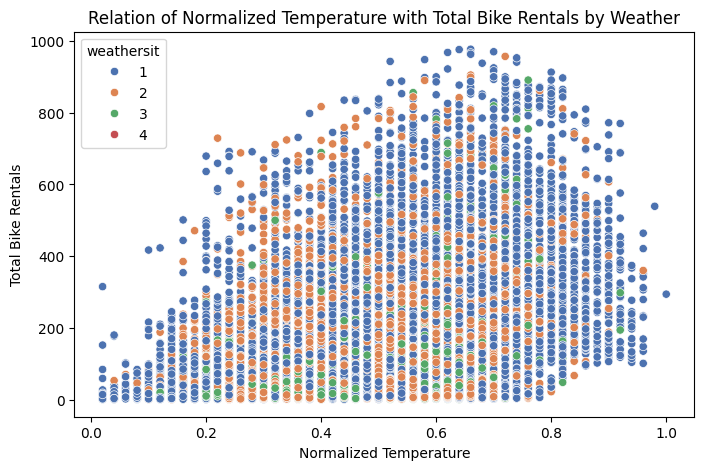

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=hour_df['temp'], y=hour_df['cnt'], hue=hour_df['weathersit'], palette='deep')
plt.title("Relation of Normalized Temperature with Total Bike Rentals by Weather")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

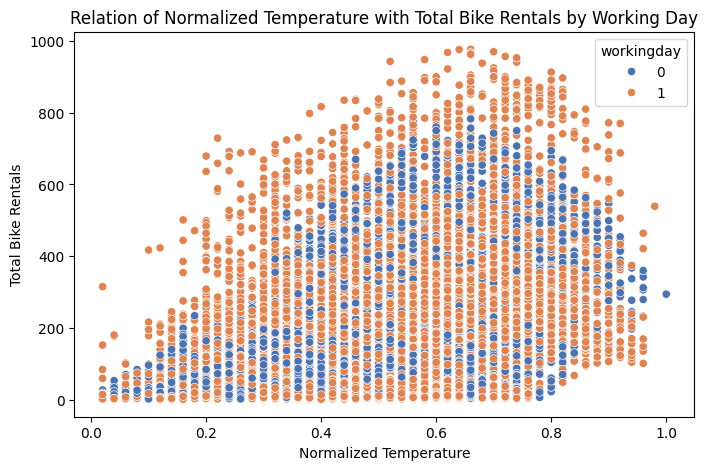

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=hour_df['temp'], y=hour_df['cnt'], hue=hour_df['workingday'], palette='deep')
plt.title("Relation of Normalized Temperature with Total Bike Rentals by Working Day")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

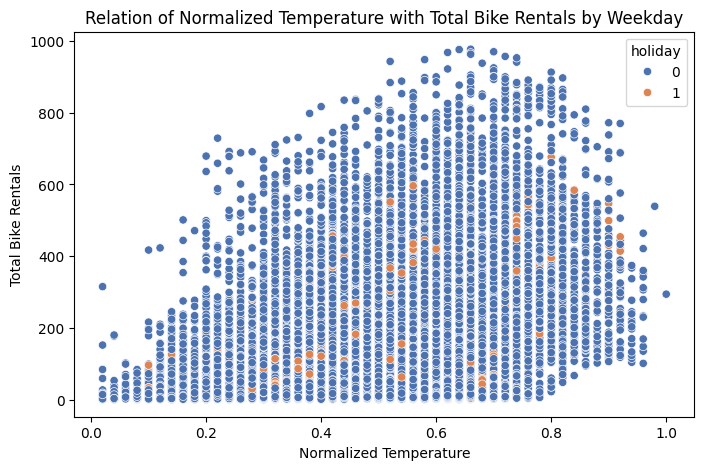

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=hour_df['temp'], y=hour_df['cnt'], hue=hour_df['holiday'], palette='deep')
plt.title("Relation of Normalized Temperature with Total Bike Rentals by Weekday")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

##### Jumlah Penyewaan Sepeda Berdasarkan `holiday`, `workingday`, dan `weathersit`.

C:\Users\fatir\AppData\Local\Temp\ipykernel_17468\901285793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')


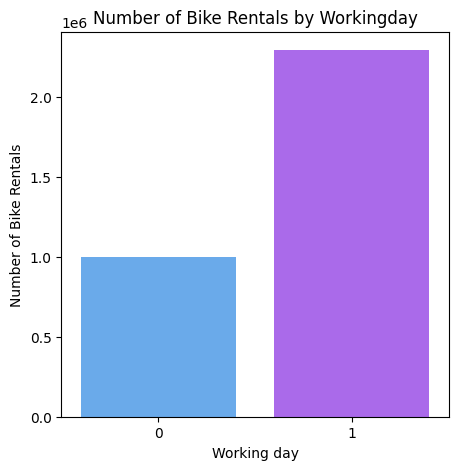

In [52]:
require_bike = hour_df.groupby('workingday')['cnt'].sum()

plt.figure(figsize=(5,5))
sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')
plt.title("Number of Bike Rentals by Workingday")
plt.xlabel("Working day")
plt.ylabel("Number of Bike Rentals")
plt.show()

C:\Users\fatir\AppData\Local\Temp\ipykernel_17468\3957583733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')


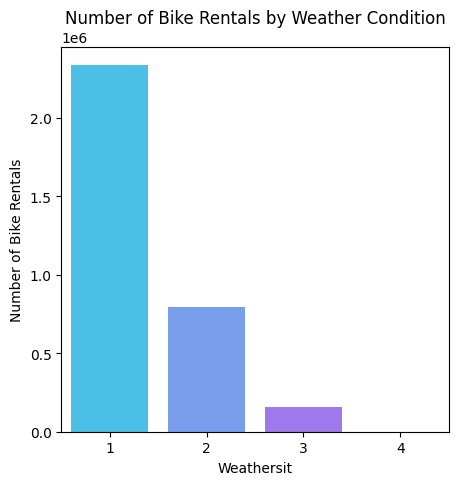

In [53]:
require_bike = hour_df.groupby('weathersit')['cnt'].sum()

plt.figure(figsize=(5,5))
sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')
plt.title("Number of Bike Rentals by Weather Condition")
plt.xlabel("Weathersit")
plt.ylabel("Number of Bike Rentals")
plt.show()

C:\Users\fatir\AppData\Local\Temp\ipykernel_17468\3050659047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')


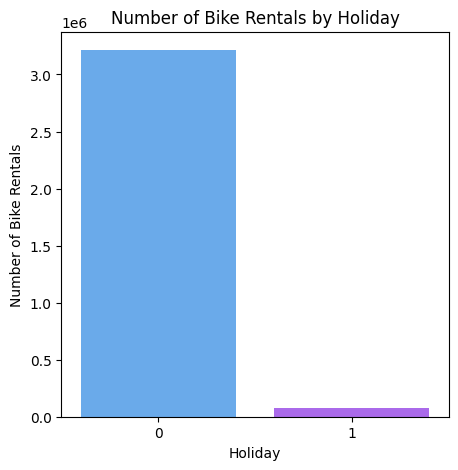

In [54]:
require_bike = hour_df.groupby('holiday')['cnt'].sum()

plt.figure(figsize=(5,5))
sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')
plt.title("Number of Bike Rentals by Holiday")
plt.xlabel("Holiday")
plt.ylabel("Number of Bike Rentals")
plt.show()

##### Rata-Rata Penyewaan Sepeda Berdasarkan `holiday`, `workingday`, dan `weathersit`.

C:\Users\fatir\AppData\Local\Temp\ipykernel_17468\1693737107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')


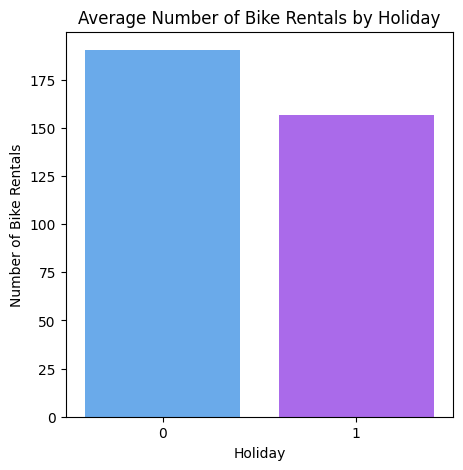

In [55]:
require_bike = hour_df.groupby('holiday')['cnt'].mean()

plt.figure(figsize=(5,5))
sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')
plt.title("Average Number of Bike Rentals by Holiday")
plt.xlabel("Holiday")
plt.ylabel("Number of Bike Rentals")
plt.show()

C:\Users\fatir\AppData\Local\Temp\ipykernel_17468\359606920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')


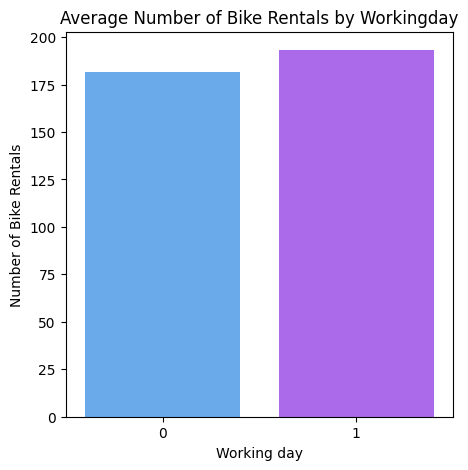

In [56]:
require_bike = hour_df.groupby('workingday')['cnt'].mean()

plt.figure(figsize=(5,5))
sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')
plt.title("Average Number of Bike Rentals by Workingday")
plt.xlabel("Working day")
plt.ylabel("Number of Bike Rentals")
plt.show()

C:\Users\fatir\AppData\Local\Temp\ipykernel_17468\2750648080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')


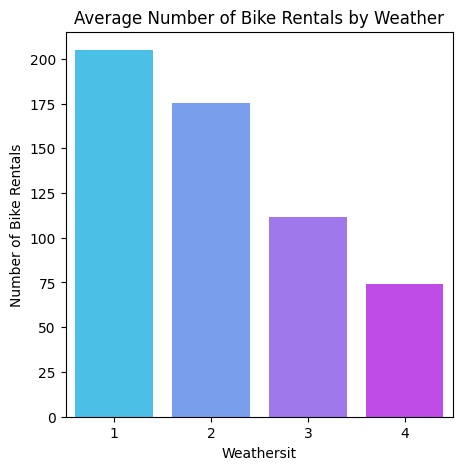

In [57]:
require_bike = hour_df.groupby('weathersit')['cnt'].mean()

plt.figure(figsize=(5,5))
sns.barplot(x=require_bike.index, y=require_bike.values, palette='cool')
plt.title("Average Number of Bike Rentals by Weather")
plt.xlabel("Weathersit")
plt.ylabel("Number of Bike Rentals")
plt.show()

### Bagaimana fluktuasi penyewaan sepeda antara pengguna biasa dan pengguna terdaftar di sepanjang musim?

In [58]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2159,2160,2011-04-04,2,0,4,20,0,1,1,2,0.70,0.6364,0.24,0.5522,40,133,173
14375,14376,2012-08-27,3,1,8,4,0,1,1,1,0.62,0.5758,0.83,0.0000,1,11,12
696,697,2011-02-01,1,0,2,9,0,2,1,2,0.16,0.2273,0.93,0.0000,2,114,116
7909,7910,2011-12-01,4,0,12,5,0,4,1,1,0.26,0.2424,0.56,0.2537,1,23,24
5738,5739,2011-09-01,3,0,9,13,0,4,1,2,0.72,0.6667,0.48,0.0896,50,169,219
4682,4683,2011-07-19,3,0,7,0,0,2,1,1,0.74,0.6970,0.66,0.1045,25,26,51
12262,12263,2012-05-31,2,1,5,3,0,4,1,1,0.62,0.6061,0.69,0.0896,0,8,8
15663,15664,2012-10-19,4,1,10,20,0,5,1,1,0.52,0.5000,0.77,0.1940,13,216,229
12732,12733,2012-06-19,2,1,6,17,0,2,1,1,0.80,0.7576,0.55,0.1940,86,725,811
1336,1337,2011-02-28,1,0,2,23,0,1,1,2,0.32,0.2879,0.81,0.3881,0,45,45


##### Mencari Korelasi

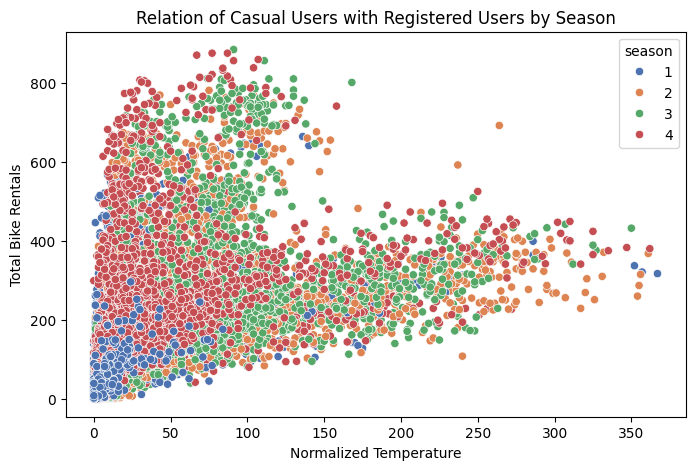

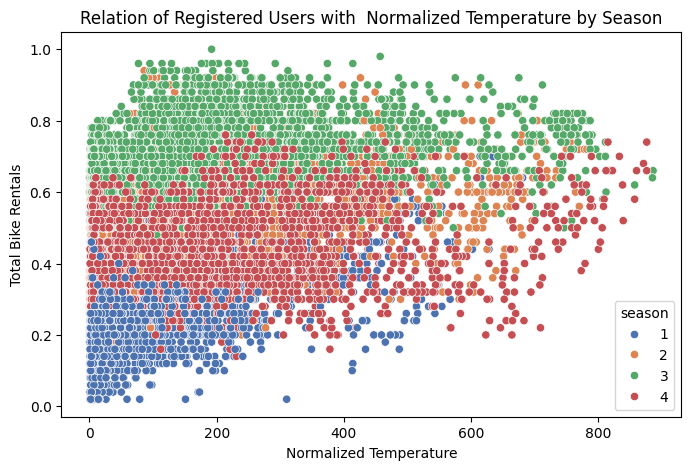

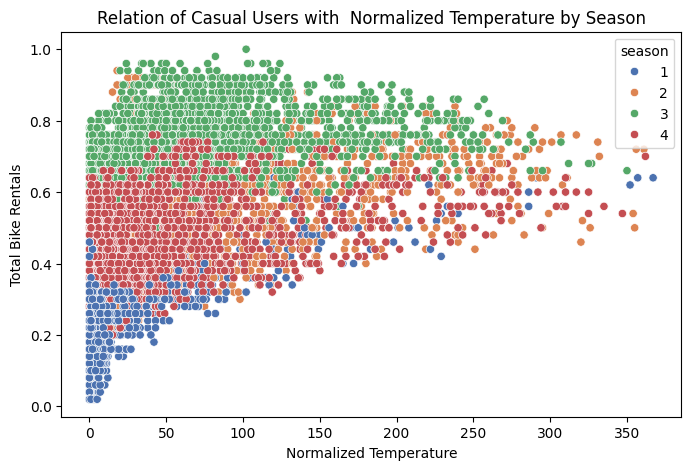

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=hour_df['casual'], y=hour_df['registered'], hue=hour_df['season'], palette='deep')
plt.title("Relation of Casual Users with Registered Users by Season")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=hour_df['registered'], y=hour_df['temp'], hue=hour_df['season'], palette='deep')
plt.title("Relation of Registered Users with  Normalized Temperature by Season")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=hour_df['casual'], y=hour_df['temp'], hue=hour_df['season'], palette='deep')
plt.title("Relation of Casual Users with  Normalized Temperature by Season")
plt.xlabel("Normalized Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

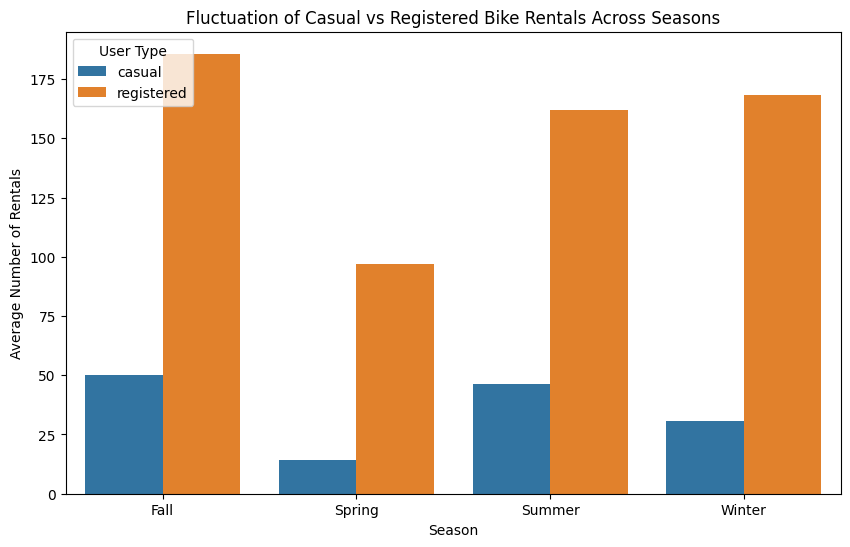

In [60]:
# Assuming 'season_x' is the correct column after the merge
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_labels)

# Group by season and calculate the average number of rentals for casual and registered users
season_group = hour_df.groupby('season')[['casual', 'registered']].mean().reset_index()

# Reshape the data for easier plotting
season_group_melted = pd.melt(season_group, id_vars='season', value_vars=['casual', 'registered'], 
                              var_name='User Type', value_name='Average Rentals')

# Create the bar plot to show the fluctuation of bike rentals between casual and registered users across seasons
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='Average Rentals', hue='User Type', data=season_group_melted)
plt.title('Fluctuation of Casual vs Registered Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Number of Rentals')
plt.legend(title='User Type', loc='upper left')
plt.show()

## Conclusion

Maka dari hasil data yang kita analisis dapat di simpulkan:

##### **Apa saja faktor utama yang mempengaruhi permintaan penyewaan sepeda?** 

Faktor-faktor utama yang secara signifikan memengaruhi permintaan penyewaan sepeda termasuk kondisi cuaca, waktu dalam setahun (musim), jenis hari (hari kerja vs akhir pekan), dan waktu dalam sehari. Suhu yang lebih hangat umumnya menyebabkan jumlah penyewaan sepeda yang lebih tinggi, sementara cuaca ekstrem seperti hujan lebat atau salju mengurangi permintaan. Tren musiman menunjukkan bahwa penyewaan sepeda mencapai puncaknya pada musim semi dan musim panas ketika cuaca lebih mendukung, dan menurun selama musim dingin seperti musim dingin. Selain itu, ada perbedaan yang jelas dalam pola penyewaan antara hari kerja dan akhir pekan. Pada hari kerja, penyewaan sepeda biasanya lebih tinggi di antara pengguna terdaftar, kemungkinan besar karena pola perjalanan, dengan jam sibuk pada pagi dan sore hari. Sebaliknya, pada akhir pekan, proporsi penyewaan yang lebih tinggi oleh pengguna biasa, yang mencerminkan lebih banyak penggunaan untuk bersantai. Pola-pola ini sangat penting untuk memahami bagaimana berbagai faktor, terutama cuaca dan waktu, mempengaruhi permintaan penyewaan sepeda secara keseluruhan.

##### **Bagaimana fluktuasi penyewaan sepeda antara pengguna biasa dan pengguna terdaftar di sepanjang musim?**

Pola penyewaan sepeda sangat bervariasi antara pengguna biasa dan pengguna terdaftar, tergantung pada musim. Pengguna terdaftar menunjukkan penggunaan yang stabil sepanjang tahun, yang kemungkinan besar mencerminkan penggunaan rutin, seperti untuk bepergian. Sementara itu, pengguna kasual menunjukkan preferensi musiman yang kuat, dengan penyewaan memuncak pada bulan-bulan hangat seperti musim semi dan musim panas dan menurun selama musim dingin. Pengguna kasual sangat aktif selama akhir pekan dan hari libur, didorong oleh kegiatan rekreasi, sedangkan pengguna terdaftar mempertahankan penggunaan yang konsisten selama hari kerja, menyoroti ketergantungan praktis mereka pada layanan ini. Fluktuasi musiman ini menekankan perbedaan perilaku dan motivasi antara pengguna biasa dan pengguna terdaftar dalam kebiasaan penyewaan sepeda.